# Learning outcomes
1. Overview of CV
2. Revisitt some important concepts of images as Numpy array
3. Cropping. Why? One of the data augmentation techniques in deep learning model development.
4. Splitting and merging of color channels
5. Mathematical operations
6. image blending (add two images tgt)

## Setip (import Module)

In [2]:
import sys
assert sys.version_info >=(3,7)
import numpy as np
import cv2 as cv
from util_func import show_img


## Image of Numpy array

In [2]:
img = np.zeros((2,4),dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


The above img variable belongs to grayscale imahe. Another primary type of image is **color image**.

In [3]:
img_color = cv.cvtColor(img,cv.COLOR_GRAY2BGR) ## (2,4,3)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


If wanna change element in array need to do indexing 
[0,**0**,0,0] [0,1]


In [4]:
img[0,1]=50
img[1,2]=100
print(img)

[[  0  50   0   0]
 [  0   0 100   0]]


In [5]:
img_color1 = cv.cvtColor(img,cv.COLOR_GRAY2BGR) #every value has been broadcasted
print(img_color1)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [100 100 100]
  [  0   0   0]]]


In RBG it only has three colour grey ,white and black (grayscale)

## Access elements in an array

In [6]:
img = cv.imread("images/lena.jfif")

a= img[49,199,2]
b = img.item(49,199,2)
a == b

True

In [8]:
%timeit a = img[49,199,2]
%timeit b = img.item(49,199,2)


109 ns ± 1.55 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
106 ns ± 0.702 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Numpy array slicing

In [ ]:
# extract the top left region of lena image
show_img("lena",img)

In [ ]:
h,w = img.shape[:2]
topleft = img[:h//2, :w//2] #flow division to make sure its integer
show_img("topleft",topleft)

In [ ]:
# extract central region of the img
yc , xc = h//2 , w//2

centre = img[yc-30:yc+30,xc-30:xc+30]
show_img("centre",centre)

## Exercise

In [ ]:
white = np.zeros((200,200))+25
white =np.uint8(white)
show_img("white",white)


In [3]:
# extract flower
img = cv.imread("images/flower.jfif")
show_img("flower",img)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [4]:
[i for i in dir(cv) if i.startswith("EVENT")]

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

In [ ]:
#1 way collback function
img = cv.imread("images/flower.jfif")

def rect_region(event,x,y,flags,params):
    """This is a mouclick callback function"""
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img,(x,y),1,(0,0,255),-1)
        cv.imshow("img",img)
cv.imshow("img",img)
cv.setMouseCallback("img",rect_region)
cv.waitKey(0)
cv.destroyAllWindow()

In [ ]:


flower = img[39:122,93:175]

show_img("flower",flower)

In [ ]:
#2 Bounding box
img = cv.imread("images/dog.jfif")
bbox = cv.selectROI("img",img)

#(x,y,w,h)
dog = img[int(bbox[1]):int(bbox[1]+bbox[3]),
            int(bbox[0]):int(bbox[0]+bbox[2])]
show_img("dog",dog)

In [ ]:
#3 point opp

In [ ]:
# geerate a repeating pattern
img_arr = np.zeros((30,30),dtype=np.uint8)

img_arr[:10,10:20]=255
img_arr[10:20,:10]=255
img_arr[10:20,20:]=255
img_arr[20:,10:20]=255

img  = np.tile(img_arr,(3,3))

show_img("pattern",img)

## Image cropping
Why?
- Remove unwanted objects from cropping
- Rule of thirds. Seperate images into $3 \times 3$ grids, and we place our camera in a way such that the object of interest is on the grid line or its intersection, the picture will look more appealing.
- One of the data augmentation techniques

In [ ]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

#parameter definition
h, w = img.shape[:2]
n_vertical_grids =4
n_horizontal_grids = 4

# we need to get the number of (pixels) for column and row
M =int(h/ n_vertical_grids)
N =int(w/n_horizontal_grids)


tiles =[]
for y in range(0,h,M):# h is h-1
    for x in range(0,w,N):
        x1 = x+ N
        y1 = y+M
        
        if x1 > w and y1 > h:
            x1 = w-1
            y1 = h-1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile=img[y:h,x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h-1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile=img[y:h,x:x1]
            tiles.append(tile)
        elif x1 > w:
            x1 = w-1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile=img[y:y1,x:w]
            tiles.append(tile)
        else:
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile=img[y:h,x:w]
            tiles.append(tile)
show_img("crop",img_copy)

In [ ]:
show_img("patch",tiles[5])

# Splitting and merging of color channels

In [3]:
img = cv.imread("images/lena.jfif")

b,g,r = cv.split(img)

img_merge=cv.merge((b,g,r))

np.array_equal(img,img_merge)

True

In [8]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'red channel'), [], []]

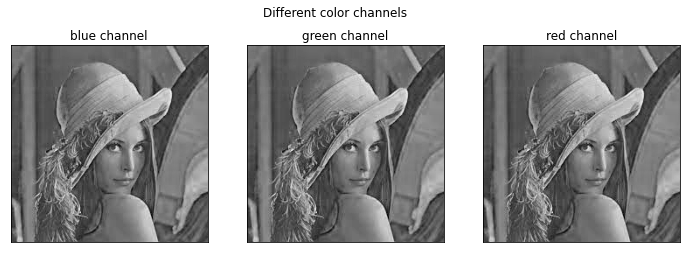

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4),sharey=True) # 1 row 3 column
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title = "blue channel",xticks=[],yticks=[])
ax2.imshow(b, cmap=plt.cm.gray)
ax2.set(title = "green channel",xticks=[],yticks=[])
ax3.imshow(b, cmap=plt.cm.gray)
ax3.set(title = "red channel",xticks=[],yticks=[])

plt.tight_layout()
plt.show()

### Exercise

In [ ]:
### Apply color filter
img=cv.imread("images/dog.jfif")

colors = ("blue","green","red")

channels = cv.split(img)

imgs =[]
for i,ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[:,:,1]= ch
    img.append(img_arr)
    
for img , c in zip( imgs,colors):
    cv.imshow(c,img)

cv.waitKey(0)
cv.destroyAllWindows()

## Point operaters (mathematical operations)
f(x) =alphaf(x)+ beta
- if alpha>1 then enhance image content
- if beta > 0 then increase brigthness
- 0< alpha <0 then decrease img content
- beta <0 decrease brigthness
- bold x is vector not scalar

$$ f_(trans)(\textbf(x)) = \alpha f(\textbf(x)+\beta $$

In [2]:
np.uint8(np.array([-2,0,255,300]))

array([254,   0, 255,  44], dtype=uint8)

In [2]:
def point_op(img,alpha,beta):
    """point operaters,arguments:
    1. Source image
    2. multiplier
    3. constant"""

    img = img.astype(float)
    res = alpha *img +beta
    res = np.clip(res,0,255)
    return np.uint8(res)

In [ ]:
# enhance brightness and contrast
img=cv.imread("images/bridge.jfif")

transform=point_op(img,2,30)

cv.imshow("original",img)
show_img("transform",transform)

In [ ]:
#darken it
transform2 = point_op(img,1,-80)

cv.imshow("original",img)
show_img("transform2",transform2)

## gamma correction
- it will make it more realistic (camera)
- purpose : brightness
$$ O = (\frac{I}{255}^(\gamma) * 255$$

In [ ]:
gamma = 1/2.2

lookUpTable = np.empty((1,256),dtype=np.uint8)
for i in range(256):
    lookUpTable[0,i]= np.clip(pow(i/255,gamma)*255,0,255)

img = cv.imread("images/mountains_prop.jpy")
res = cv.LUT(img, lookUpTable)

cv.nameWindow("original",cv.WINDOW_NORMAL)
cv.imshow("original",img)
show_img("gamma correction",res,adjust=True)

## Image Blending (add 2 images tgt)
get a sense of transparency

$$ (\textbf{x}) = \alpha f(\textbf{x}+(1- \alpha)h(\textbf{x}+\beta)$$

In [ ]:
img = cv.imread("images/lena.jfif")

img2 = cv.imread("images/coins.jfif")

#resizze img2
alpha = 0.8
h,w = img.shape[:2]
img2 = cv.resize(img2,(w,h))

#blending
res = cv.addWeighted(img,alpha,img2,1-alpha,0) #beta set as 0

cv.imshow("img1",img)
cv.imshow("img2",img2)
show_img("blending",res)